In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
input_img = tf.keras.Input(shape=(100, 100, 1))

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same',  kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation=None, padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model(input_img, decoded)

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 300)     3000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 300)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 300)       810300    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 300)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 300)       810300

In [6]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [7]:
history = autoencoder.fit(x_train, x_train, epochs=1000, shuffle=True)

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 59.0052 - mae: 7.2018 - mape: 101.9700 - rmse: 7.5830 - msle: 4.2641
Epoch 2/1000
1/1 [==============================] - 0s 70ms/step - loss: 103.1566 - mae: 9.5332 - mape: 148.1163 - rmse: 10.0846 - msle: 0.6801
Epoch 3/1000
1/1 [==============================] - 0s 67ms/step - loss: 50.9842 - mae: 6.6684 - mape: 94.0855 - rmse: 7.0401 - msle: 2.9819
Epoch 4/1000
1/1 [==============================] - 0s 70ms/step - loss: 55.0199 - mae: 6.9454 - mape: 98.1504 - rmse: 7.3235 - msle: 3.7956
Epoch 5/1000
1/1 [==============================] - 0s 68ms/step - loss: 52.3991 - mae: 6.7659 - mape: 95.4380 - rmse: 7.1445 - msle: 3.2428
Epoch 6/1000
1/1 [==============================] - 0s 70ms/step - loss: 41.5419 - mae: 5.9592 - mape: 83.3026 - rmse: 6.3415 - msle: 1.7692
Epoch 7/1000
1/1 [==============================] - 0s 69ms/step - loss: 14.7153 - mae: 3.1534 - mape: 41.2818 - rmse: 3.6624 - msle: 0.2921
Epoch 8/100

1/1 [==============================] - 0s 68ms/step - loss: 1.2717 - mae: 0.4266 - mape: 6.9290 - rmse: 0.5845 - msle: 0.0069
Epoch 60/1000
1/1 [==============================] - 0s 69ms/step - loss: 1.2585 - mae: 0.4209 - mape: 6.8186 - rmse: 0.5751 - msle: 0.0066
Epoch 61/1000
1/1 [==============================] - 0s 67ms/step - loss: 1.2507 - mae: 0.4234 - mape: 7.0179 - rmse: 0.5702 - msle: 0.0069
Epoch 62/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.2326 - mae: 0.4075 - mape: 6.6161 - rmse: 0.5561 - msle: 0.0062
Epoch 63/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.2146 - mae: 0.3943 - mape: 6.5308 - rmse: 0.5417 - msle: 0.0062
Epoch 64/1000
1/1 [==============================] - 0s 67ms/step - loss: 1.2081 - mae: 0.3907 - mape: 6.5883 - rmse: 0.5377 - msle: 0.0063
Epoch 65/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.2030 - mae: 0.3934 - mape: 6.3953 - rmse: 0.5350 - msle: 0.0058
Epoch 66/1000
1/1 [===============

1/1 [==============================] - 0s 69ms/step - loss: 0.9282 - mae: 0.2263 - mape: 3.7892 - rmse: 0.3201 - msle: 0.0023
Epoch 118/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.9524 - mae: 0.2773 - mape: 4.5166 - rmse: 0.3578 - msle: 0.0028
Epoch 119/1000
1/1 [==============================] - 0s 67ms/step - loss: 1.0507 - mae: 0.3776 - mape: 5.9373 - rmse: 0.4773 - msle: 0.0042
Epoch 120/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.0441 - mae: 0.4059 - mape: 6.1058 - rmse: 0.4718 - msle: 0.0040
Epoch 121/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.9213 - mae: 0.2306 - mape: 3.8272 - rmse: 0.3182 - msle: 0.0023
Epoch 122/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.0181 - mae: 0.3526 - mape: 5.5603 - rmse: 0.4466 - msle: 0.0038
Epoch 123/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.9783 - mae: 0.3199 - mape: 4.9918 - rmse: 0.4013 - msle: 0.0032
Epoch 124/1000
1/1 [========

1/1 [==============================] - 0s 68ms/step - loss: 0.8227 - mae: 0.1761 - mape: 2.9600 - rmse: 0.2609 - msle: 0.0015
Epoch 176/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.8216 - mae: 0.1757 - mape: 2.9393 - rmse: 0.2608 - msle: 0.0015
Epoch 177/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.8201 - mae: 0.1756 - mape: 2.9543 - rmse: 0.2601 - msle: 0.0015
Epoch 178/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.8187 - mae: 0.1757 - mape: 2.9444 - rmse: 0.2593 - msle: 0.0015
Epoch 179/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.8175 - mae: 0.1749 - mape: 2.9568 - rmse: 0.2590 - msle: 0.0015
Epoch 180/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.8160 - mae: 0.1750 - mape: 2.9373 - rmse: 0.2581 - msle: 0.0015
Epoch 181/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.8145 - mae: 0.1734 - mape: 2.9256 - rmse: 0.2572 - msle: 0.0015
Epoch 182/1000
1/1 [========

1/1 [==============================] - 0s 68ms/step - loss: 0.7559 - mae: 0.1562 - mape: 2.6208 - rmse: 0.2351 - msle: 0.0012
Epoch 234/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.7564 - mae: 0.1615 - mape: 2.6638 - rmse: 0.2379 - msle: 0.0012
Epoch 235/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.7573 - mae: 0.1643 - mape: 2.7590 - rmse: 0.2414 - msle: 0.0013
Epoch 236/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.7546 - mae: 0.1609 - mape: 2.6490 - rmse: 0.2376 - msle: 0.0012
Epoch 237/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.7518 - mae: 0.1545 - mape: 2.6003 - rmse: 0.2334 - msle: 0.0012
Epoch 238/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.7518 - mae: 0.1569 - mape: 2.6477 - rmse: 0.2351 - msle: 0.0012
Epoch 239/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.7521 - mae: 0.1621 - mape: 2.6645 - rmse: 0.2375 - msle: 0.0012
Epoch 240/1000
1/1 [========

1/1 [==============================] - 0s 69ms/step - loss: 0.7045 - mae: 0.1448 - mape: 2.4031 - rmse: 0.2180 - msle: 0.0010
Epoch 292/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.7037 - mae: 0.1439 - mape: 2.4101 - rmse: 0.2176 - msle: 0.0010
Epoch 293/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.7024 - mae: 0.1426 - mape: 2.3767 - rmse: 0.2161 - msle: 9.9333e-04
Epoch 294/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.7015 - mae: 0.1422 - mape: 2.3639 - rmse: 0.2157 - msle: 9.8387e-04
Epoch 295/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.7007 - mae: 0.1420 - mape: 2.3644 - rmse: 0.2153 - msle: 9.8056e-04
Epoch 296/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.6997 - mae: 0.1414 - mape: 2.3554 - rmse: 0.2145 - msle: 9.7340e-04
Epoch 297/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.6990 - mae: 0.1420 - mape: 2.3797 - rmse: 0.2145 - msle: 9.8192e-04
Epoch 29

1/1 [==============================] - 0s 66ms/step - loss: 0.6623 - mae: 0.1333 - mape: 2.1926 - rmse: 0.2025 - msle: 8.5808e-04
Epoch 349/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.6620 - mae: 0.1341 - mape: 2.2348 - rmse: 0.2034 - msle: 8.8030e-04
Epoch 350/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.6619 - mae: 0.1369 - mape: 2.2230 - rmse: 0.2046 - msle: 8.6310e-04
Epoch 351/1000
1/1 [==============================] - 0s 75ms/step - loss: 0.6621 - mae: 0.1386 - mape: 2.3007 - rmse: 0.2063 - msle: 9.0297e-04
Epoch 352/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.6622 - mae: 0.1426 - mape: 2.2836 - rmse: 0.2080 - msle: 8.7800e-04
Epoch 353/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.6622 - mae: 0.1423 - mape: 2.3569 - rmse: 0.2093 - msle: 9.2737e-04
Epoch 354/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.6613 - mae: 0.1442 - mape: 2.2990 - rmse: 0.2086 - msle: 8.7922e-04


1/1 [==============================] - 0s 76ms/step - loss: 0.6960 - mae: 0.2789 - mape: 4.0298 - rmse: 0.3243 - msle: 0.0017
Epoch 405/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.6887 - mae: 0.2605 - mape: 4.0495 - rmse: 0.3136 - msle: 0.0018
Epoch 406/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.6680 - mae: 0.2330 - mape: 3.3939 - rmse: 0.2796 - msle: 0.0013
Epoch 407/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.6346 - mae: 0.1513 - mape: 2.4582 - rmse: 0.2129 - msle: 9.3780e-04
Epoch 408/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.6258 - mae: 0.1272 - mape: 2.0877 - rmse: 0.1924 - msle: 7.8370e-04
Epoch 409/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.6420 - mae: 0.1782 - mape: 2.7191 - rmse: 0.2317 - msle: 9.9800e-04
Epoch 410/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.6535 - mae: 0.2025 - mape: 3.1183 - rmse: 0.2563 - msle: 0.0012
Epoch 411/1000
1

1/1 [==============================] - 0s 69ms/step - loss: 0.6073 - mae: 0.1523 - mape: 2.3708 - rmse: 0.2062 - msle: 8.2893e-04
Epoch 462/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.6108 - mae: 0.1589 - mape: 2.5380 - rmse: 0.2154 - msle: 9.2711e-04
Epoch 463/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.5996 - mae: 0.1269 - mape: 2.0671 - rmse: 0.1889 - msle: 7.3919e-04
Epoch 464/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.6045 - mae: 0.1460 - mape: 2.2963 - rmse: 0.2026 - msle: 8.0773e-04
Epoch 465/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.6048 - mae: 0.1433 - mape: 2.3442 - rmse: 0.2044 - msle: 8.6995e-04
Epoch 466/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.5975 - mae: 0.1237 - mape: 2.0384 - rmse: 0.1869 - msle: 7.4057e-04
Epoch 467/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.6019 - mae: 0.1448 - mape: 2.2698 - rmse: 0.1994 - msle: 7.8510e-04


1/1 [==============================] - 0s 68ms/step - loss: 0.5705 - mae: 0.1112 - mape: 1.8349 - rmse: 0.1734 - msle: 6.3389e-04
Epoch 518/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.5700 - mae: 0.1112 - mape: 1.8334 - rmse: 0.1731 - msle: 6.3108e-04
Epoch 519/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.5696 - mae: 0.1115 - mape: 1.8362 - rmse: 0.1730 - msle: 6.2890e-04
Epoch 520/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.5691 - mae: 0.1108 - mape: 1.8289 - rmse: 0.1728 - msle: 6.3019e-04
Epoch 521/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.5686 - mae: 0.1111 - mape: 1.8302 - rmse: 0.1726 - msle: 6.2627e-04
Epoch 522/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.5681 - mae: 0.1107 - mape: 1.8259 - rmse: 0.1723 - msle: 6.2484e-04
Epoch 523/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.5677 - mae: 0.1104 - mape: 1.8220 - rmse: 0.1722 - msle: 6.2465e-04


1/1 [==============================] - 0s 68ms/step - loss: 0.5458 - mae: 0.1061 - mape: 1.7464 - rmse: 0.1645 - msle: 5.6408e-04
Epoch 574/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.5454 - mae: 0.1057 - mape: 1.7407 - rmse: 0.1642 - msle: 5.6279e-04
Epoch 575/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.5452 - mae: 0.1058 - mape: 1.7397 - rmse: 0.1648 - msle: 5.6891e-04
Epoch 576/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.5452 - mae: 0.1098 - mape: 1.7901 - rmse: 0.1657 - msle: 5.6742e-04
Epoch 577/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.5450 - mae: 0.1077 - mape: 1.7612 - rmse: 0.1662 - msle: 5.7780e-04
Epoch 578/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.5446 - mae: 0.1108 - mape: 1.8025 - rmse: 0.1662 - msle: 5.6772e-04
Epoch 579/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.5440 - mae: 0.1072 - mape: 1.7540 - rmse: 0.1656 - msle: 5.7249e-04


1/1 [==============================] - 0s 72ms/step - loss: 0.5250 - mae: 0.1096 - mape: 1.7633 - rmse: 0.1609 - msle: 5.2311e-04
Epoch 630/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.5240 - mae: 0.1032 - mape: 1.6797 - rmse: 0.1588 - msle: 5.2083e-04
Epoch 631/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.5232 - mae: 0.1036 - mape: 1.6857 - rmse: 0.1573 - msle: 5.0705e-04
Epoch 632/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.5226 - mae: 0.1001 - mape: 1.6406 - rmse: 0.1562 - msle: 5.0616e-04
Epoch 633/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.5220 - mae: 0.1003 - mape: 1.6444 - rmse: 0.1555 - msle: 5.0017e-04
Epoch 634/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.5216 - mae: 0.0994 - mape: 1.6323 - rmse: 0.1552 - msle: 4.9913e-04
Epoch 635/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.5212 - mae: 0.0993 - mape: 1.6300 - rmse: 0.1550 - msle: 4.9828e-04


1/1 [==============================] - 0s 71ms/step - loss: 0.5048 - mae: 0.1011 - mape: 1.6408 - rmse: 0.1522 - msle: 4.7296e-04
Epoch 686/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.5068 - mae: 0.1076 - mape: 1.7256 - rmse: 0.1596 - msle: 5.1928e-04
Epoch 687/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.5088 - mae: 0.1231 - mape: 1.9186 - rmse: 0.1667 - msle: 5.3291e-04
Epoch 688/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.5084 - mae: 0.1164 - mape: 1.8348 - rmse: 0.1664 - msle: 5.5065e-04
Epoch 689/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.5065 - mae: 0.1155 - mape: 1.8290 - rmse: 0.1614 - msle: 5.1134e-04
Epoch 690/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.5039 - mae: 0.1024 - mape: 1.6474 - rmse: 0.1541 - msle: 4.8482e-04
Epoch 691/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.5022 - mae: 0.0974 - mape: 1.5914 - rmse: 0.1497 - msle: 4.6107e-04


1/1 [==============================] - 0s 67ms/step - loss: 0.4854 - mae: 0.0926 - mape: 1.5104 - rmse: 0.1432 - msle: 4.2230e-04
Epoch 742/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.4855 - mae: 0.0961 - mape: 1.5542 - rmse: 0.1445 - msle: 4.2537e-04
Epoch 743/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.4862 - mae: 0.0981 - mape: 1.5749 - rmse: 0.1478 - msle: 4.4309e-04
Epoch 744/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.4872 - mae: 0.1079 - mape: 1.7082 - rmse: 0.1521 - msle: 4.5613e-04
Epoch 745/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.4882 - mae: 0.1085 - mape: 1.7074 - rmse: 0.1562 - msle: 4.8101e-04
Epoch 746/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.4893 - mae: 0.1195 - mape: 1.8602 - rmse: 0.1607 - msle: 4.9393e-04
Epoch 747/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.4902 - mae: 0.1178 - mape: 1.8331 - rmse: 0.1643 - msle: 5.2173e-04


1/1 [==============================] - 0s 69ms/step - loss: 0.4949 - mae: 0.1779 - mape: 2.6822 - rmse: 0.2131 - msle: 7.9422e-04
Epoch 798/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.5119 - mae: 0.2074 - mape: 3.0494 - rmse: 0.2502 - msle: 0.0010
Epoch 799/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.5172 - mae: 0.2280 - mape: 3.3730 - rmse: 0.2611 - msle: 0.0011
Epoch 800/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.4955 - mae: 0.1731 - mape: 2.5794 - rmse: 0.2163 - msle: 7.9922e-04
Epoch 801/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.4760 - mae: 0.1259 - mape: 1.9508 - rmse: 0.1659 - msle: 5.1943e-04
Epoch 802/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.4688 - mae: 0.0948 - mape: 1.5322 - rmse: 0.1433 - msle: 4.2158e-04
Epoch 803/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.4809 - mae: 0.1374 - mape: 2.0892 - rmse: 0.1813 - msle: 6.0373e-04
Epoch 80

1/1 [==============================] - 0s 67ms/step - loss: 0.4595 - mae: 0.1114 - mape: 1.7313 - rmse: 0.1553 - msle: 4.6480e-04
Epoch 854/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.4613 - mae: 0.1253 - mape: 1.9133 - rmse: 0.1615 - msle: 4.8003e-04
Epoch 855/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.4631 - mae: 0.1258 - mape: 1.9339 - rmse: 0.1679 - msle: 5.2663e-04
Epoch 856/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.4665 - mae: 0.1445 - mape: 2.1715 - rmse: 0.1785 - msle: 5.6176e-04
Epoch 857/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.4700 - mae: 0.1481 - mape: 2.2567 - rmse: 0.1885 - msle: 6.4011e-04
Epoch 858/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.4761 - mae: 0.1730 - mape: 2.5643 - rmse: 0.2049 - msle: 7.0851e-04
Epoch 859/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.4811 - mae: 0.1788 - mape: 2.6970 - rmse: 0.2172 - msle: 8.1196e-04


1/1 [==============================] - 0s 69ms/step - loss: 0.4410 - mae: 0.0935 - mape: 1.4942 - rmse: 0.1379 - msle: 3.8322e-04
Epoch 910/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.4530 - mae: 0.1361 - mape: 2.0511 - rmse: 0.1767 - msle: 5.5938e-04
Epoch 911/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.4718 - mae: 0.1934 - mape: 2.8762 - rmse: 0.2241 - msle: 8.4789e-04
Epoch 912/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.4793 - mae: 0.2022 - mape: 2.9760 - rmse: 0.2407 - msle: 9.2591e-04
Epoch 913/1000
1/1 [==============================] - 0s 75ms/step - loss: 0.4814 - mae: 0.2150 - mape: 3.1643 - rmse: 0.2455 - msle: 9.8799e-04
Epoch 914/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.4664 - mae: 0.1747 - mape: 2.6201 - rmse: 0.2131 - msle: 7.7337e-04
Epoch 915/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.4520 - mae: 0.1432 - mape: 2.1367 - rmse: 0.1770 - msle: 5.4450e-04


1/1 [==============================] - 0s 67ms/step - loss: 0.4287 - mae: 0.0982 - mape: 1.5396 - rmse: 0.1374 - msle: 3.6896e-04
Epoch 966/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.4275 - mae: 0.0901 - mape: 1.4299 - rmse: 0.1339 - msle: 3.6031e-04
Epoch 967/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.4267 - mae: 0.0898 - mape: 1.4292 - rmse: 0.1315 - msle: 3.4634e-04
Epoch 968/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.4260 - mae: 0.0846 - mape: 1.3580 - rmse: 0.1296 - msle: 3.4203e-04
Epoch 969/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.4255 - mae: 0.0850 - mape: 1.3661 - rmse: 0.1284 - msle: 3.3564e-04
Epoch 970/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.4250 - mae: 0.0823 - mape: 1.3286 - rmse: 0.1277 - msle: 3.3410e-04
Epoch 971/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.4247 - mae: 0.0825 - mape: 1.3334 - rmse: 0.1272 - msle: 3.3155e-04


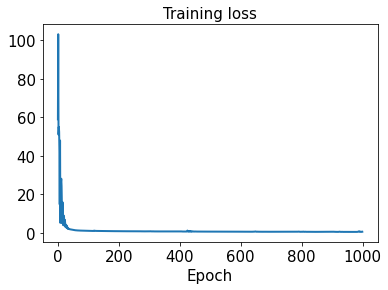

In [8]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

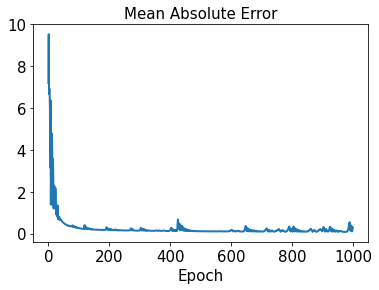

In [9]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [10]:
test_results = autoencoder.evaluate(x_test)

1/1 [==============================] - 0s 119ms/step - loss: 0.4021 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [11]:
decoded_imgs = autoencoder.predict(x_test)

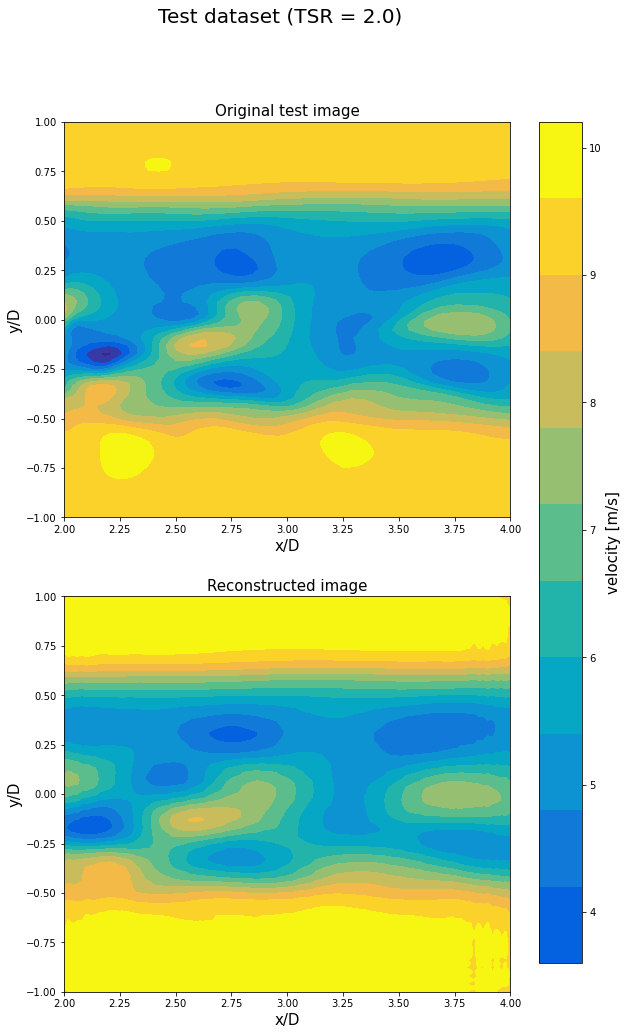

In [12]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [13]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[1.08654280e+01]
   [8.31302643e-01]
   [2.31412101e+00]
   ...
   [4.23593092e+00]
   [3.14269066e+00]
   [7.65300226e+00]]

  [[5.21216989e-01]
   [3.92684126e+00]
   [3.74942756e+00]
   ...
   [4.18228006e+00]
   [2.97369576e+00]
   [1.82581270e+00]]

  [[1.83835733e+00]
   [4.13716364e+00]
   [3.72488117e+00]
   ...
   [3.99145174e+00]
   [3.24044156e+00]
   [2.17269206e+00]]

  ...

  [[1.17050685e-01]
   [1.89906490e+00]
   [2.81958365e+00]
   ...
   [2.88391685e+00]
   [3.03206611e+00]
   [5.82164526e-01]]

  [[8.01755607e-01]
   [1.67523289e+00]
   [2.96568847e+00]
   ...
   [2.79285192e+00]
   [2.34334254e+00]
   [1.81999075e+00]]

  [[1.22582693e+01]
   [5.77603641e-04]
   [1.30621147e+00]
   ...
   [1.29024545e-03]
   [6.03416681e-01]
   [1.06767435e+01]]]]


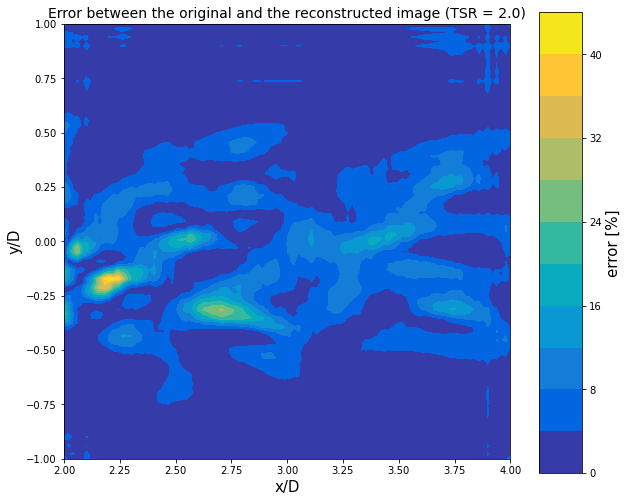

In [14]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

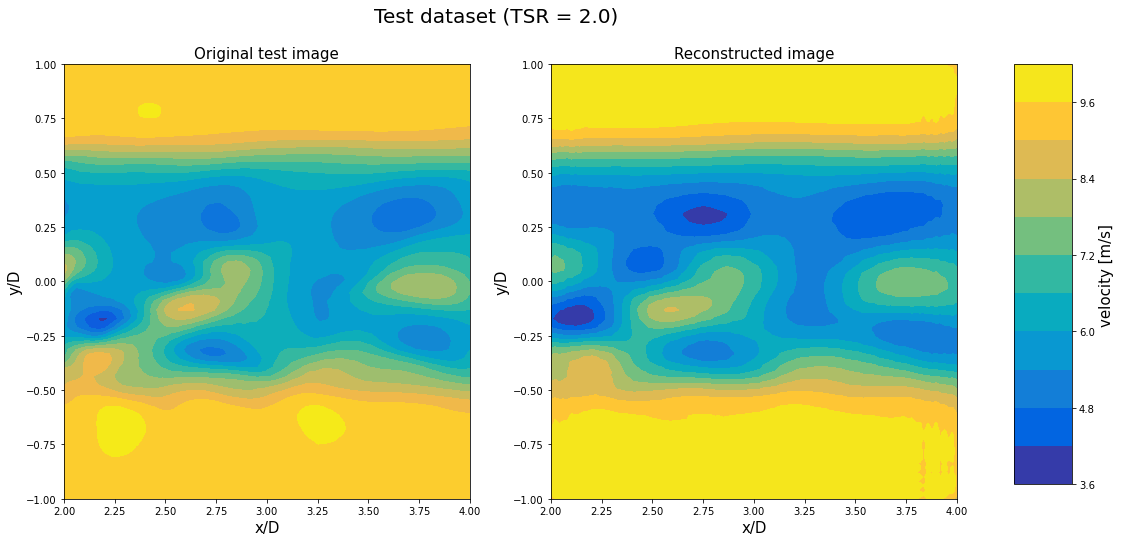

In [15]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [16]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict(train0).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [17]:
train0_orig = x_train[0].reshape(100, 100)

In [18]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [19]:
print(error_train0)

[[11.067627    0.60449034  2.0156753  ...  4.2286286   3.1200457
   7.699155  ]
 [ 0.3745659   3.7865744   3.5160503  ...  4.2212267   3.0060866
   1.8206564 ]
 [ 1.780056    4.118915    3.6098971  ...  4.059396    3.3049436
   2.2020342 ]
 ...
 [ 0.06374972  1.9776715   2.9059656  ...  2.6694257   2.8464284
   0.40624076]
 [ 0.7119184   1.7884005   3.098051   ...  2.5253587   2.1123722
   2.0400531 ]
 [12.136457    0.17830881  1.5185993  ...  0.3444356   0.91460264
  10.939297  ]]


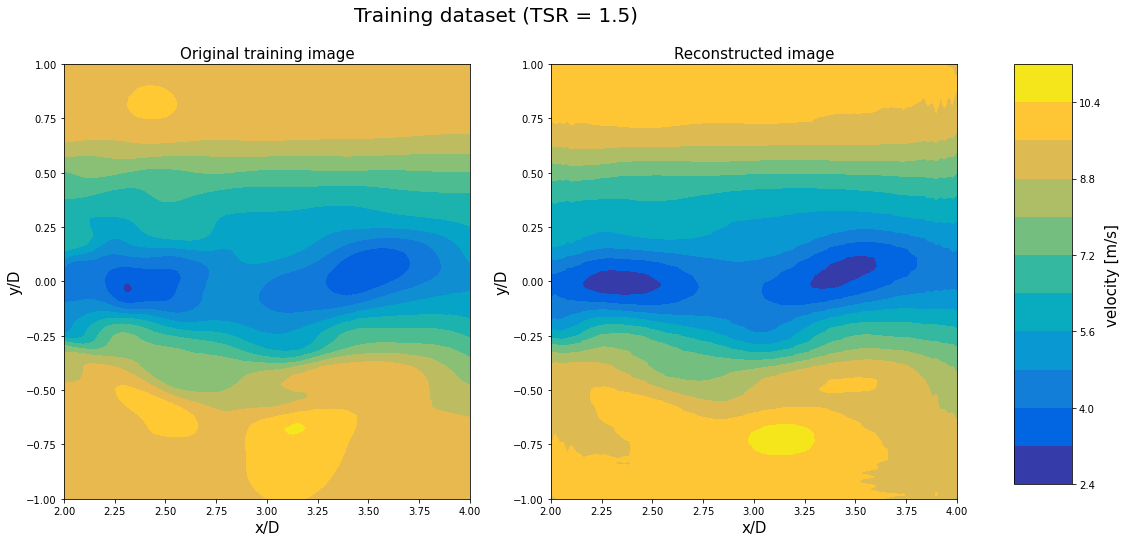

In [25]:
plt.figure(figsize=(16, 8))

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

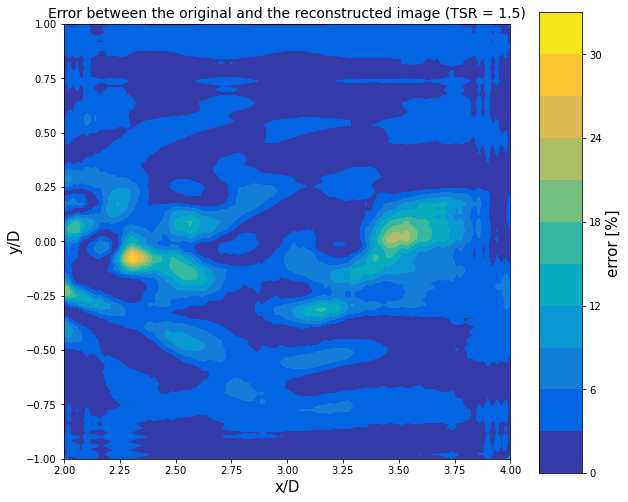

In [20]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

In [21]:
print(np.mean(error_train0))

3.8682144


In [22]:
print(np.max(error_train0))

30.57019


In [23]:
print(np.mean(error_test))

4.1984696


In [24]:
print(np.max(error_test))

43.80087
